---
title: "Clustering: Penguins"
author: "Julia Chen"
date: "2023-11-29"
categories: []
image: "image_penguins.jpg"
---

# Blog Post 2: Clustering

For this blog post, I will be applying the concept of clustering to a dataset containing information about penguins (without data on species or their classification). Clustering is an unsupervised machine learning task that groups objects/instances together without having labels/classification. In this post, I will be using the clustering algorithm DBSCAN, which is short for "density-based spatial clustering of applications with noise." There are many other clustering algorithms other than DBSCAN, such as k-means and spectral clustering.


## Prepare the data

First, let's read in our dataset from the csv file.

In [1]:
import pandas as pd

dataset = pd.read_csv("penguins.csv")
dataset

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


Since there's rows with NaN values, let's drop them:

In [2]:
dataset = dataset.dropna()

In [3]:
dataset["sex"].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

There is one penguin with 'sex' value just marked with '.' Let's remove it from the dataset

In [4]:
dataset = dataset[dataset['sex'] != "."]

In [5]:
dataset

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.986826,17.173952,214.347305,4207.185629
std,5.461540,1.973277,263.648447,804.009294
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4768.750000
max,59.600000,21.500000,5000.000000,6300.000000


Now, let's separate the male and female penguins to form separate clusters for each.

In [7]:
import matplotlib.pyplot as plt

dataset_male = dataset[dataset["sex"] == "MALE"]
dataset_female = dataset[dataset["sex"] == "FEMALE"]

And make sure they don't have null values:

In [8]:
dataset_male.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
dataset_female.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Here's some information about each dataset:

In [19]:
dataset_male.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,169.000000,169.000000,169.000000,169.000000
mean,45.831953,17.904734,230.928994,4543.934911
std,5.359109,1.866267,370.226034,785.610576
min,34.600000,14.100000,-132.000000,3250.000000
25%,41.000000,16.100000,193.000000,3900.000000
50%,46.800000,18.500000,201.000000,4300.000000
75%,50.300000,19.400000,219.000000,5300.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [10]:
dataset_female.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,165.000000,165.000000,165.000000,165.000000
mean,42.096970,16.425455,197.363636,3862.272727
std,4.903476,1.795681,12.500776,666.172050
min,32.100000,13.100000,172.000000,2700.000000
25%,37.600000,14.500000,187.000000,3350.000000
50%,42.800000,17.000000,193.000000,3650.000000
75%,46.200000,17.800000,210.000000,4550.000000
max,58.000000,20.700000,222.000000,5200.000000


Let's create separate DataFrames for each attribute

In [11]:
culmen_length_mm = pd.DataFrame({"Male": dataset_male["culmen_length_mm"], "Female": dataset_female["culmen_length_mm"]})
culmen_depth_mm = pd.DataFrame({"Male": dataset_male["culmen_length_mm"], "Female": dataset_female["culmen_length_mm"]})
flipper_length_mm = pd.DataFrame({"Male": dataset_male["culmen_length_mm"], "Female": dataset_female["culmen_length_mm"]})
body_mass_g = pd.DataFrame({"Male": dataset_male["culmen_length_mm"], "Female": dataset_female["culmen_length_mm"]})

And display them in box plots

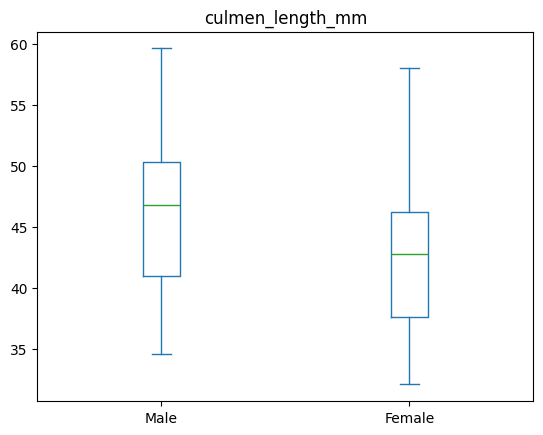

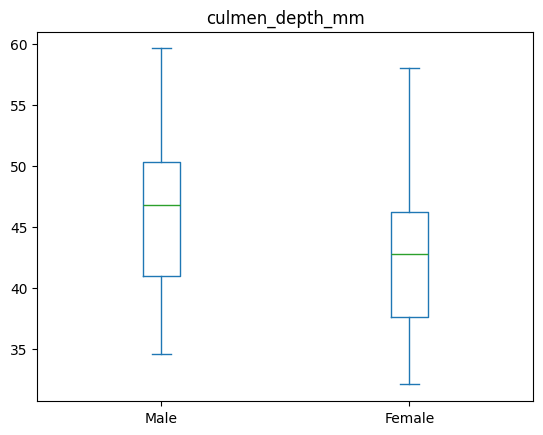

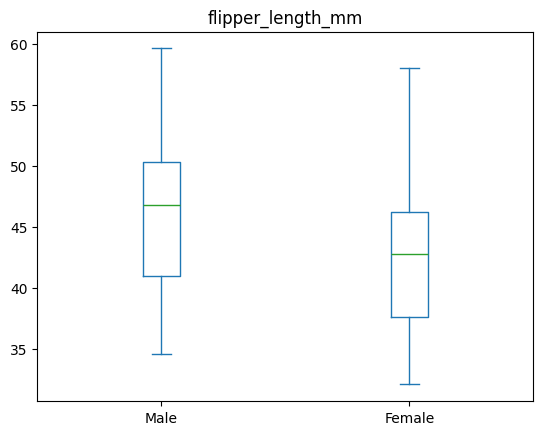

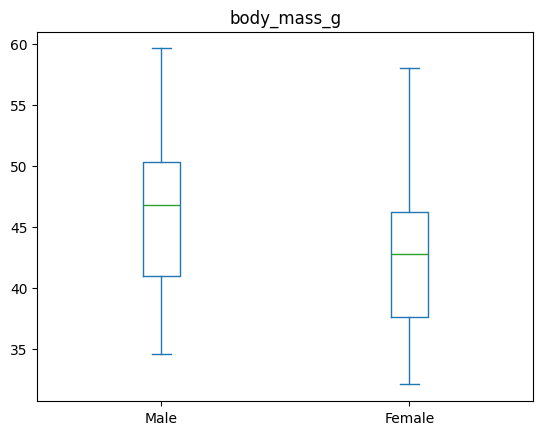

In [12]:

culmen_length_mm[["Male", "Female"]].plot(kind="box", title="culmen_length_mm")
ax = culmen_depth_mm[["Male", "Female"]].plot(kind="box", title="culmen_depth_mm")
ax = flipper_length_mm[["Male", "Female"]].plot(kind="box", title="flipper_length_mm")
ax = body_mass_g[["Male", "Female"]].plot(kind="box", title="body_mass_g")

## Clustering

Now, let's apply DBSCAN to our penguin datasets. Let's first scale the x values for each dataset.

In [13]:
from sklearn.preprocessing import StandardScaler

x_male_clusters = StandardScaler().fit_transform(dataset_male[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']])
x_female_clusters = StandardScaler().fit_transform(dataset_female[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']])

We can then use DBSCAN to form clusters using the scaled datasets

In [14]:
import numpy as np
from sklearn.cluster import DBSCAN

dbscan_male = DBSCAN(eps=0.5, min_samples=4).fit(x_male_clusters)
dbscan_female = DBSCAN(eps=0.5, min_samples=4).fit(x_female_clusters)

Using the results of the DBSCAN clustering, we can get the number of clusters and anomalies

In [15]:
labels_male = dbscan_male.labels_
labels_female = dbscan_female.labels_

anomalies_male = list(labels_male).count(-1)
anomalies_female = list(labels_female).count(-1)

clusters_male = len(set(labels_male)) - (1 if anomalies_male > 0 else 0)
clusters_female = len(set(labels_female)) - (1 if anomalies_female > 0 else 0)

print("---Male Penguins---")
print("Number of clusters = %d" % clusters_male)
print("Number of anomalies = %d" % anomalies_male)

print("\n---Female Penguins---")
print("Number of clusters = %d" % clusters_female)
print("Number of anomalies = %d" % anomalies_female)

---Male Penguins---
Number of clusters = 3
Number of anomalies = 24

---Female Penguins---
Number of clusters = 3
Number of anomalies = 51


This function is used to plot the DBSCAN results on a scatterplot [from: handson-ml3 unsupervised learning].

In [16]:
## Taken from handson-ml3 unsupervised learning
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

Using the function above, plot the DBSCAN results for the male penguins and the female penguins.

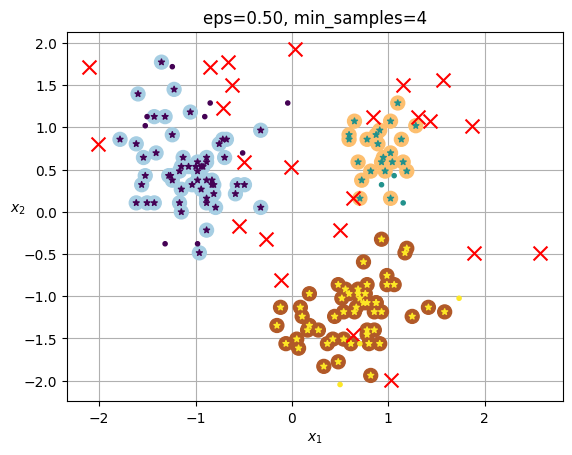

In [17]:
plot_dbscan(dbscan_male, x_male_clusters, size=100)

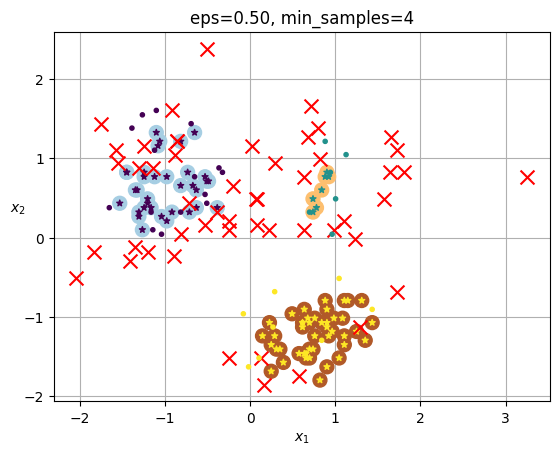

In [18]:
plot_dbscan(dbscan_female, x_female_clusters, size=100)

## Resources

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data

https://github.com/maptv/handson-ml3/blob/main/09_unsupervised_learning.ipynb

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

https://www.kaggle.com/code/kesyafebriana/clustering-penguins-species-using-dbscan

https://commons.wikimedia.org/wiki/File:Adelie_Penguins_on_iceberg.jpg